In [1]:
from skimage import *
import numpy as np
import h5py 
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
def extract_images(filename, imageName):
    """Extract the images from matlab file to numpy"""
    fData = h5py.File(filename,'r')
    inData = fData.get(imageName)  
      
    num_images = inData.shape[0]
    rows = inData.shape[1]
    cols = inData.shape[2]
    deps = inData.shape[3]
    print(num_images, rows, cols,deps)
    data = np.array(inData)

    data = data.reshape(num_images, rows, cols, deps)
    return data

# 2D1D 64 by 64

In [3]:
filename = "/home/wentao/bartek/UNet2D1D/network_64_by_64/unet2D1D_result_data.h5"

In [4]:
f = h5py.File(filename,'r') 

In [5]:
result = np.array(f.get('result'))

In [6]:
truth = np.array(f.get('truth'))

In [7]:
imag = np.array(f.get('imag'))

In [8]:
imag[0, :, :, 1]

array([[-1.63672011e-04, -1.05820306e-04,  8.64856657e-05, ...,
         1.07634471e-04,  2.24142021e-04, -1.72257060e-05],
       [ 7.36417299e-05, -2.93853102e-04, -6.77743415e-05, ...,
        -3.57612077e-04, -9.63996356e-05,  3.26233711e-04],
       [ 7.99809780e-05,  2.00907002e-04,  1.83662678e-05, ...,
        -4.71916219e-05, -1.56747705e-04, -5.84265794e-05],
       ...,
       [ 1.08530850e-04, -4.04549672e-04, -9.62246394e-05, ...,
        -4.26621005e-04, -1.28064513e-04,  4.14042440e-04],
       [ 2.37157233e-04,  3.00996067e-05, -1.78676668e-04, ...,
        -1.55766813e-04, -2.83279248e-04,  7.75841178e-05],
       [-9.38751523e-05,  3.51283829e-04,  8.52298850e-05, ...,
         3.93482071e-04,  1.14546560e-04, -3.71855714e-04]])

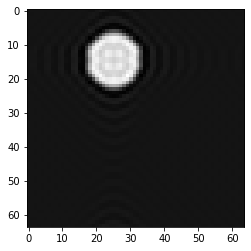

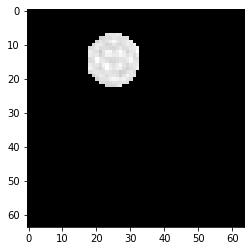

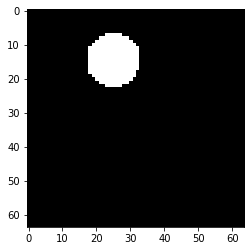

In [9]:
plt.figure(1)
plt.imshow(imag[0, :, :, 5], cmap='gray')
plt.figure(2)
plt.imshow(result[0, :, :, 5], cmap='gray')
plt.figure(3)
plt.imshow(truth[0, :, :, 5], cmap='gray')

# Evaluation

In [10]:
measure.compare_mse(result, truth)

0.00021920088144028205

In [11]:
measure.compare_nrmse(result, truth)

0.07528166789379873

In [12]:
measure.compare_psnr(result, truth, 1)

36.59157703819598

In [13]:
measure.compare_ssim(result, truth, data_range=1)

0.9981426284146779

In [14]:
filename = "/home/wentao/bartek/MRdata/trainData_tga_rot.mat"

In [15]:
recon = h5py.File(filename,'r') 

In [16]:
recon.keys()

<KeysViewHDF5 ['imagesRecon']>

In [17]:
imagesRecon = np.array(recon.get('imagesRecon'))

In [18]:
imagesRecon.shape

(2276, 128, 128, 20)

In [19]:
imagesRecon_slice = imagesRecon[:1138, :, :, :]

In [20]:
imagesRecon_slice.shape

(1138, 128, 128, 20)

In [21]:
fileOutName = "/home/wentao/bartek/MRdata/trainData_half.h5"
fData = h5py.File(fileOutName, 'w')
fData['imagesRecon'] = imagesRecon_slice
fData.close()

In [22]:
filename = "/home/wentao/bartek/MRdata/trainData_truth.mat"

In [23]:
f = h5py.File(filename,'r') 

In [24]:
f.keys()

<KeysViewHDF5 ['imagesTrue']>

In [25]:
a = np.array(f.get('imagesTrue'))

In [26]:
a.shape

(2276, 128, 128, 20)

In [27]:
imagesTrue_slice = a[:1138, :, :, :]

In [28]:
fileOutName = "/home/wentao/bartek/MRdata/trainData_truth_half.h5"
fData = h5py.File(fileOutName, 'w')
fData['imagesTrue'] = imagesTrue_slice
fData.close()

# 2D1D 128 by 128

In [29]:
filename = "/home/wentao/bartek/UNet2D1D/network_128_by_128/unet2D1D_result_data_4.h5"

In [30]:
f = h5py.File(filename,'r') 

In [31]:
result = np.array(f.get('result'))
truth = np.array(f.get('truth'))
imag = np.array(f.get('imag'))

In [32]:
result.shape

(216, 128, 128, 20)

In [33]:
imag.shape

(216, 128, 128, 20)

In [34]:
truth.shape

(216, 128, 128, 20)

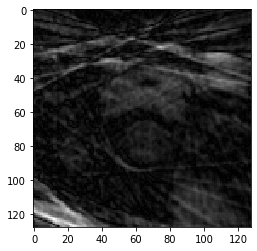

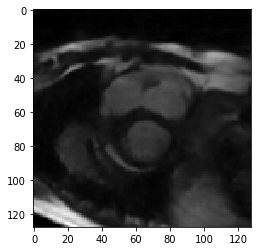

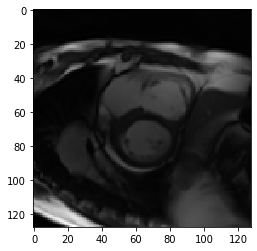

In [35]:
plt.figure(1)
plt.imshow(imag[171, :, :, 0], cmap='gray')
plt.figure(2)
plt.imshow(result[171, :, :, 0], cmap='gray')
plt.figure(3)
plt.imshow(truth[171, :, :, 0], cmap='gray')

# Evaluation

In [36]:
psnr = []
for i in range(0, truth.shape[0]):
    psnr.append(measure.compare_psnr(result[i],truth[i], 1))

In [37]:
psnr.index(max(psnr))

171

In [38]:
measure.compare_mse(result[0], truth[0])

0.0015645618372737806

In [39]:
measure.compare_nrmse(result, truth)

0.1587543356717189

In [40]:
measure.compare_psnr(result, truth, 1)

28.31071497379998

In [41]:
measure.compare_ssim(result, truth, data_range=1)

0.9171632569508142

# Visualize the training data

In [42]:
filename = "/home/wentao/bartek/MRdata/testData_tga_rot_fullSet.mat"

In [43]:
image = extract_images(filename, 'imagesRecon')

222 128 128 20


In [44]:
filename = "/home/wentao/bartek/MRdata/testData_truth.mat"

In [45]:
truth = extract_images(filename, 'imagesTrue')

222 128 128 20


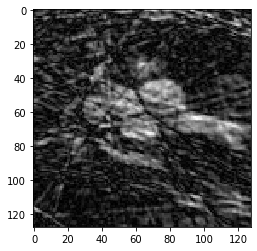

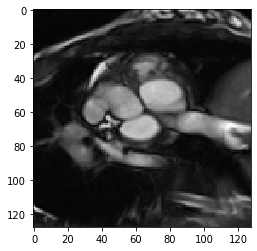

In [46]:
plt.figure(1)
plt.imshow(imag[7, :, :, 0], cmap='gray')
plt.figure(2)
plt.imshow(truth[7, :, :, 0], cmap='gray')

# 3D 64 by 64

In [47]:
filename = "/home/wentao/bartek/UNet3D/network_64_by_64/unet3D_result_data.h5"

In [48]:
f = h5py.File(filename,'r') 

In [49]:
result = np.array(f.get('result'))
truth = np.array(f.get('truth'))
imag = np.array(f.get('imag'))

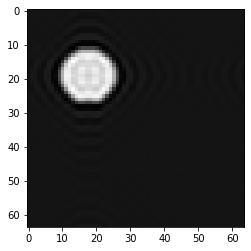

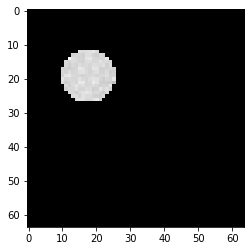

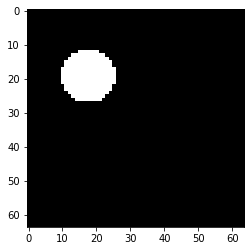

In [50]:
plt.figure(1)
plt.imshow(imag[0, :, :, 5], cmap='gray')
plt.figure(2)
plt.imshow(result[0, :, :, 5], cmap='gray')
plt.figure(3)
plt.imshow(truth[0, :, :, 5], cmap='gray')

In [51]:
measure.compare_mse(result, truth)

8.652090019468226e-05

In [52]:
measure.compare_nrmse(result, truth)

0.04808829588907238

In [53]:
measure.compare_psnr(result, truth, 1)

40.628789706528565

In [54]:
measure.compare_ssim(result, truth, data_range=1)

0.9988195881945343

# 3D 128 by 128

In [55]:
filename = "/home/wentao/bartek/UNet3D/network_128_by_128/unet3D_result_data_2.h5"

In [56]:
f = h5py.File(filename,'r') 

In [57]:
result = np.array(f.get('result'))
truth = np.array(f.get('truth'))
imag = np.array(f.get('imag'))

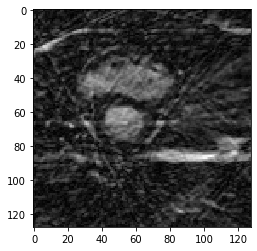

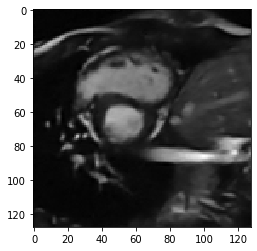

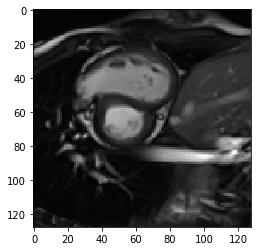

In [58]:
plt.figure(1)
plt.imshow(imag[0, :, :, 5], cmap='gray')
plt.figure(2)
plt.imshow(result[0, :, :, 5], cmap='gray')
plt.figure(3)
plt.imshow(truth[0, :, :, 5], cmap='gray')

In [59]:
measure.compare_mse(result, truth)

0.0003347861829166557

In [60]:
measure.compare_nrmse(result, truth)

0.10533416807275671

In [61]:
measure.compare_psnr(result, truth, 1)

34.75232474235764

In [62]:
measure.compare_ssim(result, truth, data_range=1)

0.9678040305786759